# Домашнее задание: Логистическая регрессия

## 1. Загрузка данных и предварительная обработка

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Загрузка данных
train_df = pd.read_csv("train_dataset.csv")
test_df = pd.read_csv("test_dataset.csv")

# Обзор данных
print("Train dataset:")
print(train_df.info())
print(train_df.head())

print("\nTest dataset:")
print(test_df.info())
print(test_df.head())

# Удаление целевой переменной 'smoking' из train (она отсутствует в test)
y_train = train_df["smoking"]
X_train = train_df.drop(columns=["smoking"])

# Заполнение пропущенных значений (медианами)
imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(test_df)  # Test не содержит целевой переменной

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Train dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           

## 2. Обучение модели логистической регрессии

In [2]:

from sklearn.linear_model import LogisticRegression

# Подбор гиперпараметров
solver_options = ["lbfgs", "liblinear"]
penalty_options = ["l2"]
C_values = [0.1, 1, 10]

best_model = None
best_score = 0

for solver in solver_options:
    for penalty in penalty_options:
        for C in C_values:
            model = LogisticRegression(solver=solver, penalty=penalty, C=C, max_iter=1000, random_state=42)
            model.fit(X_train, y_train)
            score = model.score(X_train, y_train)  # Оценка только по train
            print(f"Solver={solver}, Penalty={penalty}, C={C}, Accuracy={score:.4f}")
            
            if score > best_score:
                best_score = score
                best_model = model


Solver=lbfgs, Penalty=l2, C=0.1, Accuracy=0.7240
Solver=lbfgs, Penalty=l2, C=1, Accuracy=0.7240
Solver=lbfgs, Penalty=l2, C=10, Accuracy=0.7240
Solver=liblinear, Penalty=l2, C=0.1, Accuracy=0.7240
Solver=liblinear, Penalty=l2, C=1, Accuracy=0.7240
Solver=liblinear, Penalty=l2, C=10, Accuracy=0.7240


## 3. Оценка качества модели

Accuracy: 0.7240
Precision: 0.6402
Recall: 0.5676
F1-score: 0.6017
ROC AUC: 0.8077


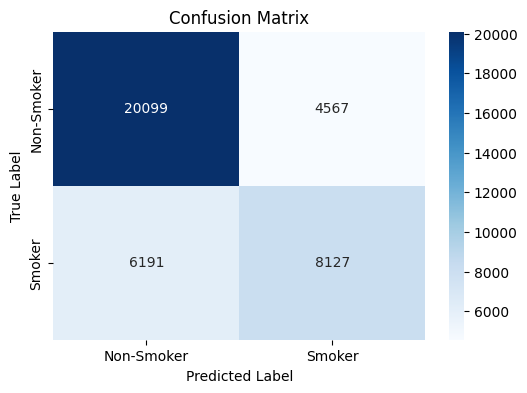

In [3]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Предсказание на train-данных
y_pred = best_model.predict(X_train)

# Метрики качества
conf_matrix = confusion_matrix(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
roc_auc = roc_auc_score(y_train, best_model.predict_proba(X_train)[:, 1])

# Вывод результатов
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Визуализация матрицы ошибок
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Smoker", "Smoker"], yticklabels=["Non-Smoker", "Smoker"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## 4. Предсказания на тестовых данных

In [4]:

# Предсказание на тестовых данных (без вычисления метрик)
y_test_pred = best_model.predict(X_test)

# Сохранение предсказаний
test_predictions = pd.DataFrame({"Prediction": y_test_pred})
test_predictions.to_csv("test_predictions.csv", index=False)
print("Предсказания на тестовых данных сохранены в 'test_predictions.csv'")


Предсказания на тестовых данных сохранены в 'test_predictions.csv'


## 5. Сохранение модели

In [5]:

import joblib

# Сохранение лучшей модели
joblib.dump(best_model, "logistic_regression_model.joblib")


['logistic_regression_model.joblib']